# Presentation materials

This notebook can be used to create materials we specifically want to use for the presentation. E.g. charts

In [4]:
# import required modules and set up environment
import os

# replace file path below with your own local convokit
os.chdir('/Users/marianneaubin/Documents/Classes/CS6742/cs6742-fork')

import convokit

from convokit import Corpus, Parser, EmoTracker, Transformer
import nltk

from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
import matplotlib.dates as mdates

In [5]:
# we have reddit data for 2007 to 2018

events = [['Fort Hood', '2009-11-05', '2009-11-13', 'forthood'],
          ['Aurora Theater', '2012-07-20', '2012-07-28', 'auroratheater'], 
          ['Sandy Hook', '2012-12-14', '2012-12-22', 'sandyhook'],
          ['Washington Navy Yard', '2013-09-16' , '2013-09-24', 'wanavyyard'],
          ['San Bernardino', '2015-12-02' , '2015-12-10', 'sanbernandino'],
          ['Orlando Nightclub', '2016-06-12' , '2016-06-20', 'orlandonightclub'],
          ['Las Vegas', '2017-10-01' , '2017-10-09', 'lasvegas'],
          ['Sutherland Springs Church', '2017-11-05' , '2017-11-13', 'sutherland'], 
          ['Stoneman Douglas High', '2018-02-14' , '2018-02-22', 'parkland'],
          ['Santa Fe High', '2018-05-18' , '2018-05-26', 'santafehigh'],
          ['Pittsburgh Synagogue', '2018-10-27' , '2018-11-04', 'pittsburgh']]

events_list = ['Fort Hood','Aurora Theater', 'Sandy Hook', 'Washington Navy Yard', 'San Bernadino',
               'Orlando Nightclub', 'Las Vegas', 'Sutherland Springs Church', 'Stoneman Douglas High', 
               'Santa Fe High',  'Pittsburgh Synagogue']

dates_list = ['2009-11-05','2012-07-20','2012-12-14', '2013-09-16', '2015-12-02', '2016-06-12' ,
             '2017-10-01' , '2017-11-05' , '2018-02-14' , '2018-05-18', '2018-10-27']

In [8]:
events_df = pd.DataFrame()
events_df["date"] = dates_list
events_df["event"] = events_list
events_df.head()

,date,event
0,2009-11-05,Fort Hood
1,2012-07-20,Aurora Theater
2,2012-12-14,Sandy Hook
3,2013-09-16,Washington Navy Yard
4,2015-12-02,San Bernadino


In [10]:
def GenerateTimeLine(data, title="Timeline", xaxis_format="%d %b", day_interval=5, figsize=(8, 5)):
    """Generates timeline from a pandas dataframe
    data : Pandas dataframe with datetimeindex
    title  Title of the plot
    zaxis_format ="%d %b %Y" valids strdate format
    dayinterval =1 default, can be anything
    Insipred from Matplotlib's excellent examples
    author: sukhbinder
    date 5/6/2018
    """
    levels = np.array([-5, 5, -3, 3, -1, 1])
    fig, ax = plt.subplots(figsize=figsize)
    # Create the base line
    start = min(data.index)
    stop = max(data.index)
    ax.plot((start, stop), (0, 0), 'k', alpha=.5)
    # Iterate through data annoting each one
    for ii, (idate, iname) in enumerate(data.itertuples()):
        level = levels[ii % 6]
        vert = 'top' if level < 0 else 'bottom'

        ax.scatter(idate, 0, s=100, facecolor='w', edgecolor='k', zorder=9999)
        # Plot a line up to the text
        ax.plot((idate, idate), (0, level), c='r', alpha=.7)
        # Give the text a faint background and align it properly
        ax.text(idate, level, iname,ha='right', va=vert, fontsize=14,
                backgroundcolor=(1., 1., 1., .3))
    ax.set(title=title)
    # Set the xticks formatting
    # format xaxis with days intervals
    ax.get_xaxis().set_major_locator(mdates.DayLocator(interval=day_interval))
    ax.get_xaxis().set_major_formatter(mdates.DateFormatter(xaxis_format))
    fig.autofmt_xdate()
    # Remove components for a cleaner look
    plt.setp((ax.get_yticklabels() + ax.get_yticklines() +
              list(ax.spines.values())), visible=False)
    
    return ax

ValueError: too many values to unpack (expected 2)

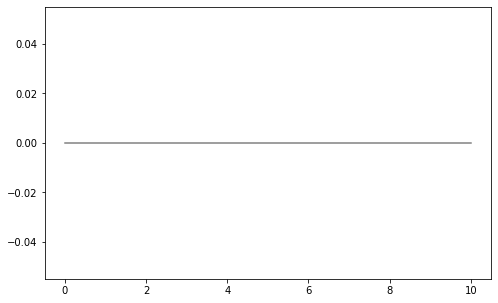

In [23]:
data = pd.read_csv(r'events.csv', parse_dates=True, index_col=0)
ax = GenerateTimeLine(events_df)
plt.show()

In [40]:
events = [['Fort Hood', '2009-11-05', '2009-11-13', 'forthood'],
          ['Aurora Theater', '2012-07-20', '2012-07-28', 'auroratheater'], 
          ['Sandy Hook', '2012-12-14', '2012-12-22', 'sandyhook'],
          ['Washington Navy Yard', '2013-09-16' , '2013-09-24', 'wanavyyard'],
          ['San Bernardino', '2015-12-02' , '2015-12-10', 'sanbernandino'],
          ['Orlando Nightclub', '2016-06-12' , '2016-06-20', 'orlandonightclub'],
          ['Las Vegas', '2017-10-01' , '2017-10-09', 'lasvegas'],
          ['Sutherland Springs Church', '2017-11-05' , '2017-11-13', 'sutherland'], 
          ['Stoneman Douglas High', '2018-02-14' , '2018-02-22', 'parkland'],
          ['Santa Fe High', '2018-05-18' , '2018-05-26', 'santafehigh'],
          ['Pittsburgh Synagogue', '2018-10-27' , '2018-11-04', 'pittsburgh']]
import plotly.figure_factory as ff

df = [dict(Task='Event', Start='2009-11-05', Finish='2009-11-13' , Event='Fort Hood'),
      dict(Task='Event', Start='2012-07-20', Finish='2012-07-28', Event = 'Aurora Theater'),
      dict(Task='Event', Start='2012-12-14', Finish='2012-12-22', Event ='Sandy Hook' ),
      dict(Task='Event', Start='2013-09-16', Finish='2013-09-24', Event ='Washington Navy Yard'),
      dict(Task='Event', Start='2015-12-02', Finish='2015-12-10', Event ='San Bernardino'),
      dict(Task='Event', Start='2016-06-12', Finish='2016-06-20', Event ='Orlando Nightclub'),
      dict(Task='Event', Start='2017-10-01', Finish='2017-10-09', Event ='Las Vegas'),
      dict(Task='Event', Start='2017-11-05', Finish='2017-11-13', Event ='Sutherland Springs Church'),
      dict(Task='Event', Start='2018-02-14', Finish='2018-02-22', Event ='Stoneman Douglas High'),
      dict(Task='Event', Start='2018-05-18', Finish='2018-05-26', Event ='Santa Fe High'),
      dict(Task='Event', Start='2018-10-27', Finish='2018-11-04', Event ='Pittsburgh Synagogue'),
      dict(Task='Event', Start='2009-03-10', Finish='2009-03-18', Event ='Geneva County')]

colors = {'Fort Hood': 'rgb(220, 0, 0)',
          'Aurora Theater': 'rgb(0, 0, 0)',
          'Sandy Hook': 'rgb(0, 0, 0)',
          'Washington Navy Yard': 'rgb(220, 0, 0)',
          'Las Vegas': 'rgb(0, 0, 0)',
          'San Bernardino': 'rgb(0, 0, 0)',
          'Orlando Nightclub': 'rgb(0, 0, 0)',
          'Sutherland Springs Church': 'rgb(0, 0, 0)',
          'Stoneman Douglas High': 'rgb(0, 0, 0)',
          'Santa Fe High': 'rgb(0, 0, 0)',
          'Pittsburgh Synagogue': 'rgb(220, 0, 0)',
          'Geneva County': 'rgb(220, 0, 0)',
         }

fig = ff.create_gantt(df, colors=colors, index_col='Event', group_tasks=True)
fig.show()